In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jtiptj/chest-xray-pneumoniacovid19tuberculosis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumoniacovid19tuberculosis


In [15]:
IMG_SIZE=224
BATCH_SIZE=32

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [38]:
train_generator=train_datagen.flow_from_directory(path + "/train",
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training')

Found 5061 images belonging to 4 classes.


In [40]:
val_generator=train_datagen.flow_from_directory(path +"/train",
target_size=(IMG_SIZE, IMG_SIZE), # Add target_size here
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation')

Found 1265 images belonging to 4 classes.


In [41]:
class_indices = train_generator.class_indices
class_names=list(class_indices.keys())
print(class_names)
print(class_indices)

['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}


In [42]:
from tensorflow.keras.layers import Input

model = keras.Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # Explicitly define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])

In [30]:
model.fit(train_generator, epochs=1, validation_data=val_generator,
batch_size= BATCH_SIZE)

179/179 ━━━━━━━━━━━━━━━━━━━━ 664s 4s/step - accuracy: 0.8874 - loss: 0.3477 - val_accuracy: 0.8857 - val_loss: 0.4136


In [45]:
model.save('path.h5')

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('path.h5')
print("Model Loaded")

Model Loaded


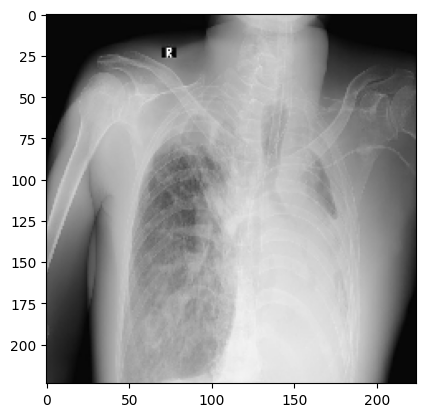

In [47]:
test_image_path="/content/1.2.392.200036.9125.4.0.19075998.3070357034.458373270.dcm.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [34]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)

In [48]:
img_array /= 255.

In [49]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.33336964 0.33335233 0.3332781 ]]


In [50]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
COVID19
